In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib

# Data preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# K means 
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

# Silhouette score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.datasets import make_circles
import warnings
warnings.filterwarnings("ignore")

# K means 
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import DBSCAN

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Data Preprocessing 

In [2]:
reviews = pd.read_csv("final_reviews.csv")

In [3]:
reviews

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,class,title,also_buy,brand,rank,also_view,main_cat,price,primary_category,sub_cat,product_type
0,4.0,True,2017-11-07,A2NIJTYWADLK57,0140503528,cotton clay,kids like story but while i really wanted a bo...,"good story, small size book though",good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
1,4.0,True,2017-03-07,A2827D8EEURMP4,0140503528,emankcin,bought this used and it came in great conditio...,good,good,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
2,5.0,True,2016-06-25,APB6087F4J09J,0140503528,Starbucks Fan,every story and book about corduroy is fantast...,best books for all children,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
3,5.0,True,2016-02-21,A2DHERRZIPFU7X,0140503528,Caitlyn Jacobson,i purchased this book for my first grade class...,great for math!,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
4,5.0,False,2015-08-02,A2XCLJRGFANRC,0140503528,E. Ervin,having spent numerous years in an elementary s...,love corduroy,great,A Pocket for Corduroy,"['0140501738', '0448421917', '0670063428', '04...",ingram book & distributor,422894.0,['0140501738'],Office Products,0.95,['Office and School Supplies'],['Education and Crafts'],['Early Childhood Education Materials']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019553,5.0,True,2016-12-31,A30ZM19J0CNAGJ,B01HJDG28E,Reggie: a music lover,night hawk is ten outstanding new recordings o...,"My favorite cut is the cover of ""(Ghost) Rider...",great,Night Hawk,"['0718074963', 'B0012GMV5S', 'B00I89Y2SQ', 'B0...",charlie daniels band,68288.0,"['B07H5VY3LK', 'B00FLV06V6', 'B00I89Y2SQ', 'B0...",Digital Music,8.00,['Country'],['Country'],NaN
2019554,3.0,True,2018-07-25,APXJ8QC63EG38,B01HJG3VZI,Steven Schubak,ok,Three Stars,average,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019555,5.0,True,2018-07-17,A5HIGHKQPINEO,B01HJG3VZI,Oman,great music great sound love the music lots of...,The sound quality and number of hits,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN
2019556,5.0,True,2018-06-23,A1B26TNQEWHQ4K,B01HJG3VZI,David W. Barsness,really good fun quality stuff,5fer,great,Original Album Classics,"['B06Y1L22WT', 'B017CJL0BO', 'B005JS7VTQ', 'B0...",the guess who,1795.0,"['B000CNE11O', 'B00000I0QI', 'B0042OZDP2', 'B0...",Digital Music,17.28,['Pop'],['Pop'],NaN


In [8]:
data = reviews[(reviews.main_cat == 'Office Products')]

In [9]:
a = data.groupby("asin")['asin'].count()
a = pd.DataFrame(a)
a

,asin
asin,
0140503528,11
0439394058,9
0439505399,5
0439506042,5
0439509769,7
...,...
B01HH2WGNC,10
B01HH3964I,14
B01HH8E2QA,10


In [10]:
a.rename(columns = {"asin":"Product ID"}, inplace = True)
a.reset_index(inplace = True)
a.rename(columns = {"asin":"ProductID", "Product ID":"order_count"}, inplace = True)
a

,ProductID,order_count
0,0140503528,11
1,0439394058,9
2,0439505399,5
3,0439506042,5
4,0439509769,7
...,...,...
20993,B01HH2WGNC,10
20994,B01HH3964I,14
20995,B01HH8E2QA,10
20996,B01HHLLLIO,5


In [11]:
c = data.groupby("asin")['price'].sum()
c = pd.DataFrame(c)
c.reset_index(inplace  =  True)
c.rename(columns = {"price":"total_sales"},inplace = True)
c.rename(columns = {"asin":"ProductID"}, inplace = True)
c

,ProductID,total_sales
0,0140503528,10.450000
1,0439394058,97.110000
2,0439505399,81.201091
3,0439506042,80.759694
4,0439509769,112.944184
...,...,...
20993,B01HH2WGNC,162.837060
20994,B01HH3964I,245.000000
20995,B01HH8E2QA,389.500000
20996,B01HHLLLIO,199.950000


In [12]:
merge = a.merge(c,how="left", on = "ProductID")
merge

,ProductID,order_count,total_sales
0,0140503528,11,10.450000
1,0439394058,9,97.110000
2,0439505399,5,81.201091
3,0439506042,5,80.759694
4,0439509769,7,112.944184
...,...,...,...
20993,B01HH2WGNC,10,162.837060
20994,B01HH3964I,14,245.000000
20995,B01HH8E2QA,10,389.500000
20996,B01HHLLLIO,5,199.950000


In [13]:
merge.sort_values('order_count').head(20)

,ProductID,order_count,total_sales
4145,B000WL6Z6K,1,16.011159
10407,B008LXBXFO,1,120.000000
4978,B0016SZMT4,1,15.861205
4326,B000YHGMLA,1,15.842861
4935,B0016JAL9Y,1,5.950000
4595,B0013CBMBK,1,81.390000
4605,B0013CDTQ6,1,16.436546
4920,B0016A3R26,1,15.990000
4073,B000W4H606,1,14.990000
4226,B000XMI30O,1,14.170000


In [14]:
merge.sort_values('order_count').tail(20)

,ProductID,order_count,total_sales
424,B00004Z4BK,968,6504.960000
4361,B000ZHB2HS,1037,17929.730000
17264,B00XXNU90W,1043,16962.864526
15818,B00QHBMKOU,1069,10679.310000
1154,B00006IFAY,1117,8008.890000
4399,B0010JEJPC,1136,5123.360000
1301,B00006JNNS,1233,33525.270000
11098,B00AVWKUJS,1241,20483.095641
5235,B0018NC2SQ,1316,10409.560000
17799,B0124I9AWO,1326,67692.300000


In [15]:
merge.order_count.describe()

count    20998.000000
mean        27.520002
std         68.649241
min          1.000000
25%          7.000000
50%         11.000000
75%         24.000000
max       2246.000000
Name: order_count, dtype: float64

In [16]:
merge[merge.order_count > 500].count()

ProductID      63
order_count    63
total_sales    63
dtype: int64

In [17]:
df1 =  merge.copy()

In [18]:
lst = []
for i in merge.order_count:
    if i >= 500:
        lst.append("Very High")
    elif 500 > i >= 100:
        lst.append("High")
    elif 100 > i >= 20:
        lst.append("Average")    
    elif 20 > i >= 5 :
        lst.append("Low")
    else:
        lst.append("Very Low") 
        
df1.demand = pd.DataFrame(lst)        
df1.demand.value_counts()

Low          14221
Average       5451
High           918
Very Low       344
Very High       64
dtype: int64

In [19]:
df1.isnull().sum()

ProductID      0
order_count    0
total_sales    0
dtype: int64

# Feature engineering

In [20]:
df2 = merge.copy()
df2

,ProductID,order_count,total_sales
0,0140503528,11,10.450000
1,0439394058,9,97.110000
2,0439505399,5,81.201091
3,0439506042,5,80.759694
4,0439509769,7,112.944184
...,...,...,...
20993,B01HH2WGNC,10,162.837060
20994,B01HH3964I,14,245.000000
20995,B01HH8E2QA,10,389.500000
20996,B01HHLLLIO,5,199.950000


In [21]:
df2.dtypes

ProductID       object
order_count      int64
total_sales    float64
dtype: object

In [22]:
# df2["sales"] = df2["sales"].astype('category')

# df2["sales"] = LabelEncoder().fit_transform(df2["sales"])

# df2.dtypes
# df2

In [23]:
merge.columns

Index(['ProductID', 'order_count', 'total_sales'], dtype='object')

# Data Scaling - Normalisation 

In [24]:
df3 = merge[['order_count', 'total_sales']]
scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df3), columns = df3.columns)

scaled_df

,order_count,total_sales
0,0.004454,0.000092
1,0.003563,0.000979
2,0.001782,0.000816
3,0.001782,0.000811
4,0.002673,0.001141
...,...,...
20993,0.004009,0.001652
20994,0.005791,0.002493
20995,0.004009,0.003972
20996,0.001782,0.002032


In [25]:
scaled_df.columns

Index(['order_count', 'total_sales'], dtype='object')

In [27]:
df_r = scaled_df

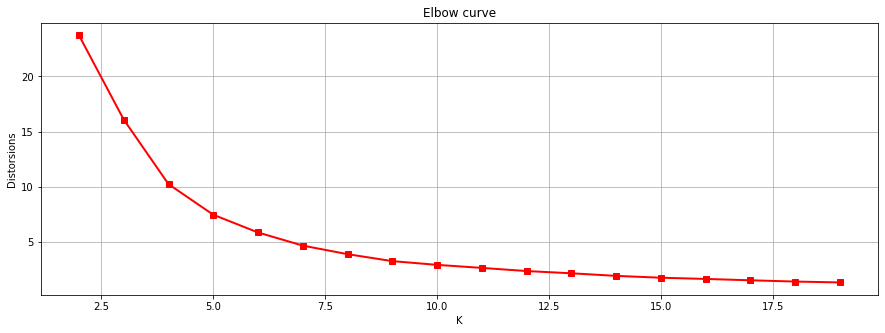

In [57]:
distorsions = []  
for k in range(2, 20):
    model_kmeans1 = KMeans(n_clusters=k)
    model_kmeans1.fit(df_r)
    distorsions.append(model_kmeans1.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions, marker='s', c='r', linewidth = 2)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

In [58]:
# Calculating silhouette scores 

range_n_clusters = np.arange(2,6)

for n_clusters in range_n_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)

    silhouette_avg = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.9844106371774347
For n_clusters = 3 The average silhouette_score is : 0.9842966478930809
For n_clusters = 4 The average silhouette_score is : 0.8687344206336125
For n_clusters = 5 The average silhouette_score is : 0.8679890783308908


In [59]:
kmean = KMeans(n_clusters = 3)
kmean.fit(df_r)

KMeans(n_clusters=3)

In [60]:
labels = kmean.fit_predict(df_r)
labels

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
kmean_df = df_r.copy()
kmean_df['label-Kmean'] = pd.DataFrame(labels)
kmean_count = pd.DataFrame(kmean_df['label-Kmean'].value_counts())
kmean_count

,label-Kmean
0,20908
1,83
2,7


In [62]:
silhouette_kmean = silhouette_score(df_r, labels)
print("Silhouette Score = {} ".format(silhouette_kmean))

Silhouette Score = 0.9842966478930809 


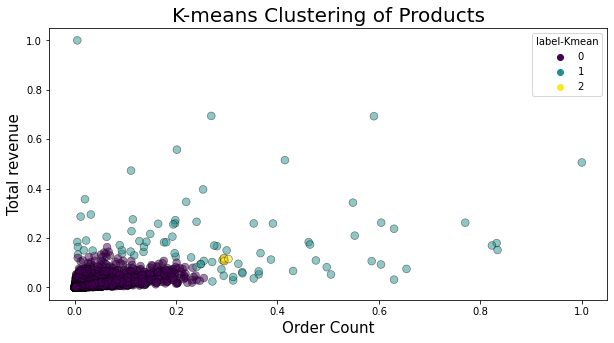

In [87]:
plt.figure(figsize = (10,5))

sb.scatterplot(x = kmean_df['order_count'] , y = kmean_df["total_sales"], hue = kmean_df['label-Kmean'], data=kmean_df, palette = 'viridis', s = 60, ec = 'black', alpha = 0.5)
plt.title('K-means Clustering of Products', size= 20)
plt.xlabel("Order Count",size = 15)
plt.ylabel("Total revenue",size = 15)

plt.show()

In [69]:
df4 = df3.copy()
df4["ProductID"] = merge['ProductID']
df4['label'] = labels
df4['class'] = df1.demand
df4

,order_count,total_sales,ProductID,label,class
0,11,10.450000,0140503528,0,Low
1,9,97.110000,0439394058,0,Low
2,5,81.201091,0439505399,0,Low
3,5,80.759694,0439506042,0,Low
4,7,112.944184,0439509769,0,Low
...,...,...,...,...,...
20993,10,162.837060,B01HH2WGNC,0,Low
20994,14,245.000000,B01HH3964I,0,Low
20995,10,389.500000,B01HH8E2QA,0,Low
20996,5,199.950000,B01HHLLLIO,0,Low


In [70]:
df4[df4.label == 1].describe()

,order_count,total_sales,label
count,83.000000,83.000000,83.0
mean,675.867470,19783.600609,1.0
std,499.095029,15910.312756,0.0
min,13.000000,2370.680000,1.0
25%,307.000000,10231.705369,1.0
50%,573.000000,16311.350000,1.0
75%,905.500000,25223.655000,1.0
max,2246.000000,97684.470000,1.0


In [71]:
df4[df4.label == 1]

,order_count,total_sales,ProductID,label,class
348,211,13307.77,B00000IRGG,1,High
375,703,2776.85,B00002NDRT,1,Very High
376,703,4147.70,B00002NDRX,1,Very High
377,816,5189.76,B00002NDS3,1,Very High
424,968,6504.96,B00004Z4BK,1,Very High
...,...,...,...,...,...
18845,288,18316.80,B017WKFHQM,1,High
18881,201,16715.16,B0183FC98E,1,High
19785,81,14579.19,B01CJNMMZG,1,Average
19906,13,97684.47,B01D736GBI,1,Low


In [72]:
df4['class'][df4.label == 1].value_counts()

Very High    48
High         25
Average       6
Low           4
Name: class, dtype: int64

In [28]:

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df_r)
distances, indices = nbrs.kneighbors(df_r)

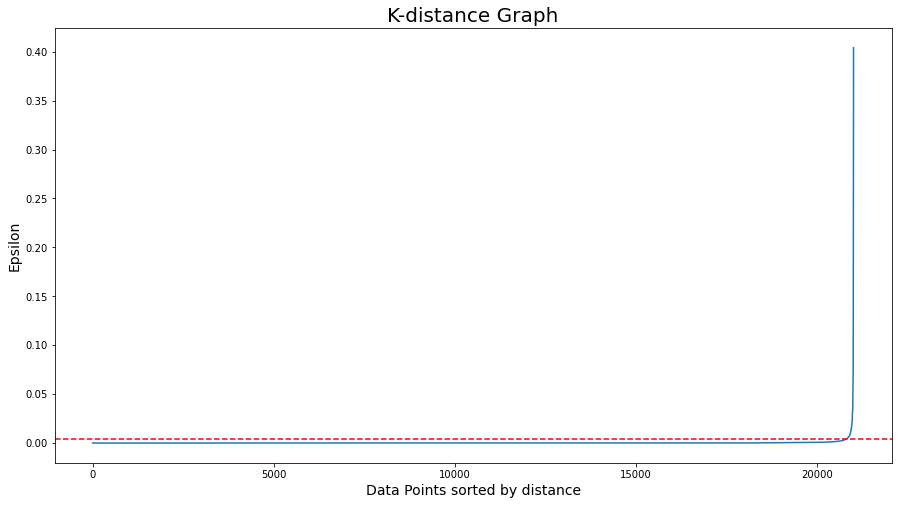

In [29]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.004, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [30]:
for eps in [0.005,0.01,0.02]:    
    for min_samples in [3,4,5]:
        clusterer = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = clusterer.fit_predict(df_r)
        x= cluster_labels +2
        y = np.bincount(x)
        ii = np.nonzero(y)[0]
        results = list(zip(ii,y[ii]) )
        print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results), '| Silhouette score',silhouette_score(df_r, cluster_labels))
    print("-------------------------------------------------------------------------------------")

eps= 0.005 | min_samples=  3 | obtained clustering:  26 | Silhouette score 0.7611051542079148
eps= 0.005 | min_samples=  4 | obtained clustering:  19 | Silhouette score 0.7580891547802303
eps= 0.005 | min_samples=  5 | obtained clustering:  13 | Silhouette score 0.7550741812533782
-------------------------------------------------------------------------------------
eps= 0.01 | min_samples=  3 | obtained clustering:  11 | Silhouette score 0.8426283806796804
eps= 0.01 | min_samples=  4 | obtained clustering:  7 | Silhouette score 0.8429709482695592
eps= 0.01 | min_samples=  5 | obtained clustering:  6 | Silhouette score 0.8995444244496483
-------------------------------------------------------------------------------------
eps= 0.02 | min_samples=  3 | obtained clustering:  8 | Silhouette score 0.8861315754195714
eps= 0.02 | min_samples=  4 | obtained clustering:  5 | Silhouette score 0.8929976837628899
eps= 0.02 | min_samples=  5 | obtained clustering:  3 | Silhouette score 0.9385596242

In [31]:
# model building 
dbscan_opt=DBSCAN(eps=0.02,min_samples=5)
dbscan_opt.fit(df_r)

DBSCAN(eps=0.02)

In [32]:
DBSCAN_opt_labels = dbscan_opt.labels_
DBSCAN_opt_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
dbscan = pd.DataFrame(df_r)
dbscan['DBSCAN_opt_labels'] = DBSCAN_opt_labels
dbscan['DBSCAN_opt_labels'].value_counts()

 0    20908
-1       83
 1        7
Name: DBSCAN_opt_labels, dtype: int64

In [34]:
score3=silhouette_score(df_r, df_r['DBSCAN_opt_labels'])
score3

0.9842966478930809

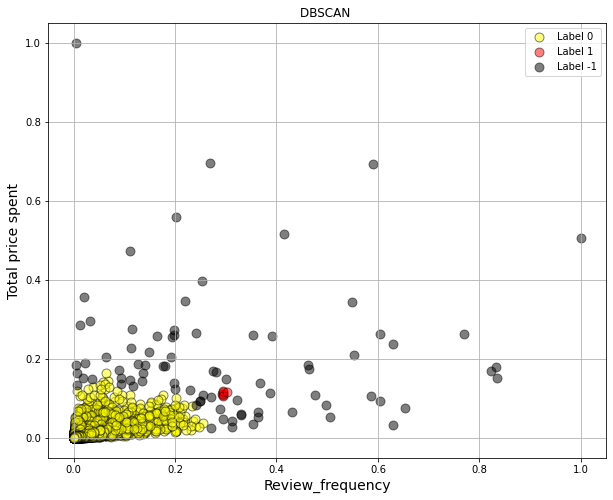

In [85]:
X = dbscan

plt.figure(figsize=(10,8))

plt.scatter(X.iloc[DBSCAN_opt_labels == 0, 0], X.iloc[DBSCAN_opt_labels == 0, 1], s = 80, c = 'yellow', label = 'Label 0',ec='black', alpha = 0.5)
plt.scatter(X.iloc[DBSCAN_opt_labels == 1, 0], X.iloc[DBSCAN_opt_labels == 1, 1], s = 80, c = 'red', label = 'Label 1', ec='black', alpha = 0.5)
#plt.scatter(X.iloc[DBSCAN_opt_labels == 2, 0], X.iloc[DBSCAN_opt_labels == 2, 1], s = 80, c = 'green', label = 'Label 2', ec='black', alpha = 0.5)
plt.scatter(X.iloc[DBSCAN_opt_labels == -1, 0], X.iloc[DBSCAN_opt_labels == -1, 1], s = 80, c = 'black', label = 'Label -1', ec='black', alpha = 0.5)

plt.grid()

plt.title('DBSCAN ')
plt.legend()
plt.xlabel('Review_frequency',fontsize=14)
plt.ylabel('Total price spent',fontsize=14)
plt.legend()
plt.show()

In [64]:
df5 = df3.copy()
df5["ProductID"] = merge['ProductID']
df5['label'] = DBSCAN_opt_labels
df5['class'] = df1.demand
df5

,order_count,total_sales,ProductID,label,class
0,11,10.450000,0140503528,0,Low
1,9,97.110000,0439394058,0,Low
2,5,81.201091,0439505399,0,Low
3,5,80.759694,0439506042,0,Low
4,7,112.944184,0439509769,0,Low
...,...,...,...,...,...
20993,10,162.837060,B01HH2WGNC,0,Low
20994,14,245.000000,B01HH3964I,0,Low
20995,10,389.500000,B01HH8E2QA,0,Low
20996,5,199.950000,B01HHLLLIO,0,Low


In [65]:
df5[df5.label == -1].describe()

,order_count,total_sales,label
count,83.000000,83.000000,83.0
mean,675.867470,19783.600609,-1.0
std,499.095029,15910.312756,0.0
min,13.000000,2370.680000,-1.0
25%,307.000000,10231.705369,-1.0
50%,573.000000,16311.350000,-1.0
75%,905.500000,25223.655000,-1.0
max,2246.000000,97684.470000,-1.0


In [66]:
df5[df5.label == -1]

,order_count,total_sales,ProductID,label,class
348,211,13307.77,B00000IRGG,-1,High
375,703,2776.85,B00002NDRT,-1,Very High
376,703,4147.70,B00002NDRX,-1,Very High
377,816,5189.76,B00002NDS3,-1,Very High
424,968,6504.96,B00004Z4BK,-1,Very High
...,...,...,...,...,...
18845,288,18316.80,B017WKFHQM,-1,High
18881,201,16715.16,B0183FC98E,-1,High
19785,81,14579.19,B01CJNMMZG,-1,Average
19906,13,97684.47,B01D736GBI,-1,Low


In [73]:
df5['class'][df5.label == -1].value_counts()

Very High    48
High         25
Average       6
Low           4
Name: class, dtype: int64

In [67]:
df5["class"].value_counts()

Low          14221
Average       5451
High           918
Very Low       344
Very High       64
Name: class, dtype: int64

In [50]:
x = data[['asin','title','main_cat','primary_category',"sub_cat"]]

In [68]:
y = df5.merge(x,how = 'left', left_on = "ProductID", right_on='asin' )
y = y.drop_duplicates(keep = 'first', ignore_index = True)
y.drop('asin', axis = 1, inplace = True)
y

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
0,11,10.450000,0140503528,0,Low,A Pocket for Corduroy,Office Products,['Office and School Supplies'],['Education and Crafts']
1,9,97.110000,0439394058,0,Low,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,['Office and School Supplies'],['Presentation Boards']
2,5,81.201091,0439505399,0,Low,Scholastic Weather Dial Chart (TF2131),Office Products,['Office and School Supplies'],['Education and Crafts']
3,5,80.759694,0439506042,0,Low,Scholastic Counting 1-100 Math Wall Chart (TF2...,Office Products,['Office and School Supplies'],['Education and Crafts']
4,7,112.944184,0439509769,0,Low,Scholastic Place Value Bulletin Board (TF3037),Office Products,['Office and School Supplies'],['Presentation Boards']
...,...,...,...,...,...,...,...,...,...
20993,10,162.837060,B01HH2WGNC,0,Low,"BIC Velocity Original Mechanical Pencil, Thick...",Office Products,['Office and School Supplies'],['Writing and Correction Supplies']
20994,14,245.000000,B01HH3964I,0,Low,TheBoxery LUX Kraft Padded Bubble Mailers Enve...,Office Products,['Office and School Supplies'],"['Envelopes, Mailers and Shipping Supplies']"
20995,10,389.500000,B01HH8E2QA,0,Low,#9 Double Window SELF SEAL Security Envelopes ...,Office Products,['Office and School Supplies'],"['Envelopes, Mailers and Shipping Supplies']"
20996,5,199.950000,B01HHLLLIO,0,Low,"BESTEASY Thermal Shipping Labels 250 4x6,compa...",Office Products,['Office and School Supplies'],"['Labels, Indexes and Stamps']"


In [88]:
y[y.label == 1]

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
889,661,10569.390000,B00006IDQT,1,Very High,"Astrobrights Color Paper, 8.5&rdquo; x 11&rdqu...",Office Products,['Office and School Supplies'],['Paper']
1211,664,10898.315841,B00006IFIK,1,Very High,"EXPO 80074 Low-Odor Dry Erase Markers, Chisel ...",Office Products,['Office and School Supplies'],['Writing and Correction Supplies']
2690,656,10775.184650,B000CS787S,1,Very High,"Duck Brand Bubble Wrap Roll, 3/16&quot; Origin...",Office Products,['Office and School Supplies'],"['Envelopes, Mailers and Shipping Supplies']"
3950,662,11353.300000,B000UNVOKM,1,Very High,Noodlers Ink 3 Oz Borealis Black,Office Products,['Office and School Supplies'],['Writing and Correction Supplies']
4153,662,11624.720000,B000WP32ZI,1,Very High,"Noodler's Fountain Ink, 3 oz Bottle, Habannero...",Office Products,['Office and School Supplies'],['Writing and Correction Supplies']
6235,664,10391.600000,B001MSKZ8G,1,Very High,Noodlers Ink 3 Oz Blue-Black,Office Products,['Office and School Supplies'],['Writing and Correction Supplies']
12290,682,11242.098005,B00E58RQ4Q,1,Very High,"Canon PG-245 Black Cartridge, Compatible to MX...",Office Products,['Office and School Supplies'],['Printer Ink and Toner']


In [91]:
lst=[]
for i in y.sub_cat:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst.append(i)
lst

lst1=[]
for i in y.primary_category:
    i = str(i)
    i = i.split('[')[1] 
    i = i.split(']')[0]
    i = i.strip('\"')
    i = i.strip("\'")
   
    #i = i.replace["\'s ",'']
    lst1.append(i)
lst1

y.sub_cat = lst

y.primary_category = lst1
y.head()

,order_count,total_sales,ProductID,label,class,title,main_cat,primary_category,sub_cat
0,11,10.450000,0140503528,0,Low,A Pocket for Corduroy,Office Products,Office and School Supplies,Education and Crafts
1,9,97.110000,0439394058,0,Low,Scholastic SC939405 All-In-One Schoolhouse Cal...,Office Products,Office and School Supplies,Presentation Boards
2,5,81.201091,0439505399,0,Low,Scholastic Weather Dial Chart (TF2131),Office Products,Office and School Supplies,Education and Crafts
3,5,80.759694,0439506042,0,Low,Scholastic Counting 1-100 Math Wall Chart (TF2...,Office Products,Office and School Supplies,Education and Crafts
4,7,112.944184,0439509769,0,Low,Scholastic Place Value Bulletin Board (TF3037),Office Products,Office and School Supplies,Presentation Boards


In [92]:
high = y[['ProductID','title','main_cat','primary_category','sub_cat']][(y.label == -1)|(y.label == 1)]
high

,ProductID,title,main_cat,primary_category,sub_cat
348,B00000IRGG,Cross Classic Century 10KT Gold-Filled Ballpoi...,Office Products,Office and School Supplies,Writing and Correction Supplies
375,B00002NDRT,DYMO LetraTag Labeling Tape for LetraTag Label...,Office Products,Office and School Supplies,"Tape, Adhesives and Fasteners"
376,B00002NDRX,DYMO LetraTag Labeling Tape for LetraTag Label...,Office Products,Office and School Supplies,"Tape, Adhesives and Fasteners"
377,B00002NDS3,DYMO Standard D1 45010 Labeling Tape (Black Pr...,Office Products,Office and School Supplies,"Tape, Adhesives and Fasteners"
424,B00004Z4BK,"Scotch Long Lasting Storage Packaging Tape, 1....",Office Products,Office and School Supplies,"Envelopes, Mailers and Shipping Supplies"
...,...,...,...,...,...
18845,B017WKFHQM,"BIC Mark-It Permanent Marker, Ultra Fine Point...",Office Products,Office and School Supplies,Writing and Correction Supplies
18881,B0183FC98E,"12 Pack of Scotch Permanent Double Sided Tape,...",Office Products,Office and School Supplies,"Tape, Adhesives and Fasteners"
19785,B01CJNMMZG,HP M9L75A#B1H OfficeJet Pro 8720 All-in-One Wi...,Office Products,Office Electronics,Printers and Accessories
19906,B01D736GBI,"BinaryABC Fountain Pen Set,Jinhao 599 Student ...",Office Products,Office and School Supplies,Writing and Correction Supplies


In [94]:
high.to_csv("High_demanding_products_Office.csv", index = False)